## Analyze the output of the hcn1 edt

The hcn1 edt gives us the distance of each pixel in the hcn1 mask to the nearest vascular mask pixel (in um)


In [1]:
import os

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels

import tifffile

## Utility functions

In [2]:
def myLabelSize(g, myFontSize=22):
    """
    g: return of seaborn plot function
    """
    g.set_xlabel(g.get_xlabel(), size = myFontSize)
    g.set_ylabel(g.get_ylabel(), size = myFontSize)
    #
    g.set_xticklabels(g.get_xticks(), size = myFontSize)
    g.set_yticklabels(g.get_yticks(), size = myFontSize)

    # yticklabels were sometimes blowing up into 1.000000000001
    ylabels = [str(round(y,1)) for y in g.get_yticks()] # used below
    g.set_yticklabels(ylabels, size = myFontSize) # using from above

def printStackInfo(name, data):
    print('stack', filename, 
          stackData.shape, 
          stackData.dtype, 
          'min:', np.nanmin(stackData), 
          'max:', np.nanmax(stackData), 
          'mean:', np.nanmean(stackData))
    
def myLegend(g):
    g.legend()
    plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
    plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title


## Load hcn1 edt

In [3]:
# load a list

legendList = [
    'distalHead',
    'head',
    'mid'
]

pathList = [
    '/Users/cudmore/box/data/nathan/20200420/analysis/20200420_distalHEAD__ch1_9_edt.tif',
    '/Users/cudmore/box/data/nathan/20200420/analysis/20200420_HEAD__ch1_9_edt.tif',
    '/Users/cudmore/box/data/nathan/20200420/analysis/20200420_MID__ch1_9_edt.tif',
]

stackDataList = []
for path in pathList:
    stackData = tifffile.imread(path)

    filename = os.path.basename(path)
    printStackInfo(filename, stackData)

    stackDataList.append(stackData)
    


stack 20200420_distalHEAD__ch1_9_edt.tif (26, 1024, 1024) float32 min: 0.0 max: 49.71332 mean: 11.911905
stack 20200420_HEAD__ch1_9_edt.tif (36, 1024, 1024) float32 min: 0.0 max: 75.18001 mean: 8.928503
stack 20200420_MID__ch1_9_edt.tif (23, 1024, 1024) float32 min: 0.0 max: 70.23193 mean: 10.07037


In [4]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

## Plot raw edt distances as a histogram 

We are doing this to show that 'really short' distances contaminate the measurement. These are pixels in hcn1 mask that are super close to a vessel. In this dataset there are some 200,000 of them.

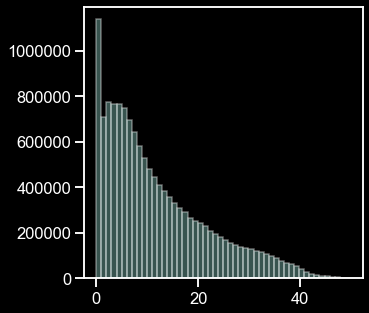

In [5]:
fig, ax = plt.subplots(1, 1, sharey=False, figsize=(5,5))

stackData = stackDataList[0]

norm_hist = False

# histogrsm
g = sns.distplot(stackData, hist=True, kde=False, norm_hist=norm_hist, ax=ax)



## Remove really short distances

Rational, is these are pushing right up again a vessel and there are LOTS of them


removing distances <= 1


/Users/cudmore/Sites/bImPy/bImPy_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less_equal
  """


stack 20200420_distalHEAD__ch1_9_edt.tif (26, 1024, 1024) float32 min: 1.0111758 max: 49.71332 mean: 12.99995
stack 20200420_HEAD__ch1_9_edt.tif (36, 1024, 1024) float32 min: 1.0015583 max: 75.18001 mean: 10.247228
stack 20200420_MID__ch1_9_edt.tif (23, 1024, 1024) float32 min: 1.0111758 max: 70.23193 mean: 11.1082735


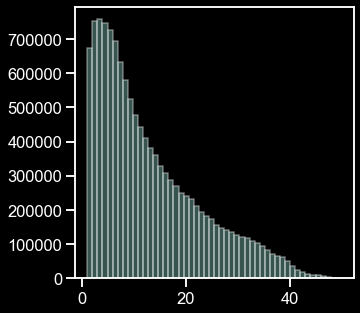

In [6]:
# remove really short distances
removeLessThanUm = 1
print('removing distances <=', removeLessThanUm)
for idx, stackData in enumerate(stackDataList):
    stackData[stackData<=removeLessThanUm] = np.nan
    
    filename = os.path.basename(pathList[idx])
    printStackInfo(filename, stackData)

#
# plot again
fig, ax = plt.subplots(1, 1, sharey=False, figsize=(5,5))
stackData = stackDataList[0]
# histogrsm
g = sns.distplot(stackData, hist=True, kde=False, norm_hist=False, ax=ax)


 ## Plot hcn1 edt histogram

This is the distribution of distances (um) from each pixel in hcn1 mask to closest vascular mask.

Looking at this tells me there may be a difference between (distalHead, head, mid) but we simply need more images to get an average !!!

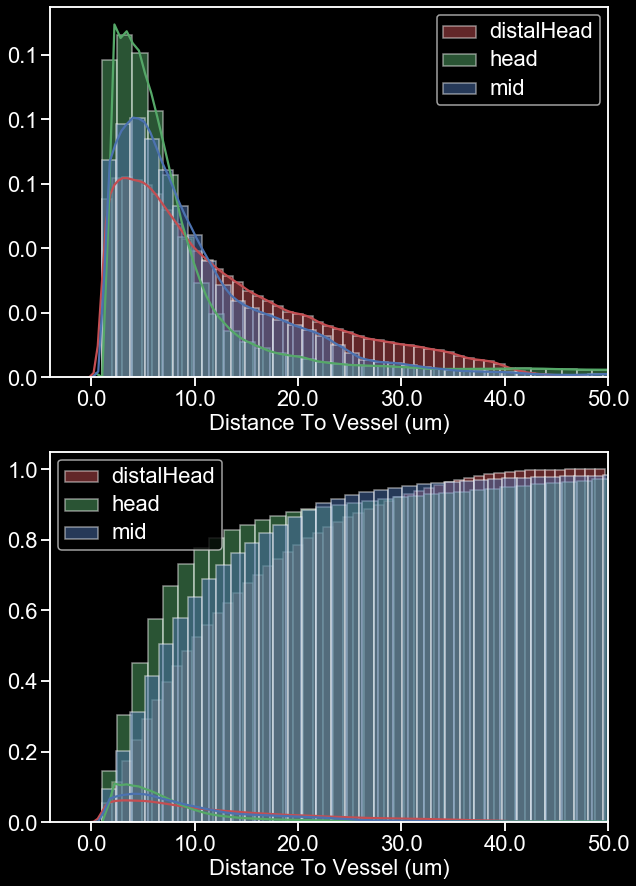

In [8]:

fig, axs = plt.subplots(2, 1, sharey=False, figsize=(10,15))

hist = True
kde = True # kde: Whether to plot a gaussian kernel density estimate (if True ... VERY SLOW)
norm_hist = True

hist_kws = {
    'alpha':0.5, # set to 1 so colors do not 'sum'
    'cumulative':False
}
colorList = ['r', 'g', 'b']

# histogram
ax = axs[0]
for idx, stackData in enumerate(stackDataList):
    color = colorList[idx]
    label = legendList[idx]
    g = sns.distplot(stackData, hist=hist, kde=kde, norm_hist=norm_hist,
                     hist_kws=hist_kws, color=color, label=label, ax=ax)

#print('type(g):', type(g))
myLabelSize(g)
g.set(xlim=(None, 50))
g.set(xlabel='Distance To Vessel (um)')
myLegend(g)

# cumulative
kde = False
hist_kws = {
    'alpha':0.5, # set to 1 so colors do not 'sum'
    'cumulative':True
}
kde_kws = {
    'cumulative': False # THIS IS SUPER SUPER SLOW !!!
}

ax = axs[1]
for idx, stackData in enumerate(stackDataList):
    color = colorList[idx]
    label = legendList[idx]
    g = sns.distplot(stackData, hist=hist, kde_kws=kde_kws, norm_hist=norm_hist,
                     hist_kws=hist_kws, color=color, label=label, ax=ax)

myLabelSize(g)
g.set(xlim=(None, 50))
g.set(xlabel='Distance To Vessel (um)')
myLegend(g)

